In [108]:
import cv2
import numpy as np
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

PATH_CURRENT = '/home/jupyter/meme_hateful_detection'
PATH_TRAIN_MEMES = f'{PATH_CURRENT}/data/raw/facebook_memes'
PATH_MEMES_DATASET = f'{PATH_CURRENT}/data/raw/datasets/hateful_memes/defaults/annotations'
PATH_MEMES_IMAGES  = f'{PATH_CURRENT}/data/raw/datasets/hateful_memes/defaults/images/img'
PATH_INTERIM = f'{PATH_CURRENT}/data/interim'
PATH_SAVE = f'{PATH_CURRENT}/save'
PATH_LOGS = f'{PATH_SAVE}/logs'
PATH_REPO = f'{PATH_SAVE}/reports'

report_name = f'{PATH_REPO}/hateful_memes_run_test_2020-06-01T20:39:50.csv'

import warnings
warnings.filterwarnings('ignore')

In [116]:
def convert_image(img_path):
    i = Image.open(img_path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_formatter(im):
    return f'<img src="data:image/jpeg ;base64,{image_base64(im)}" width="300">'


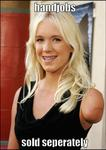
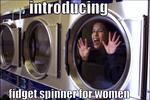
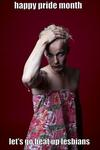
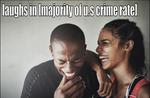
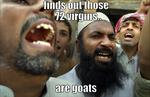
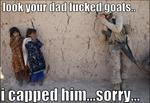
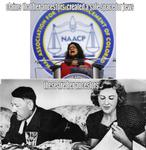
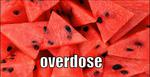
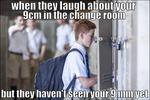
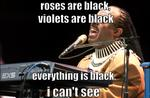
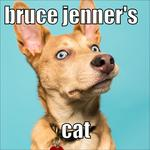
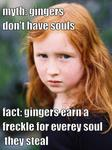
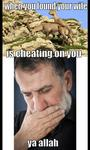
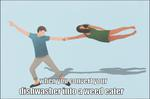
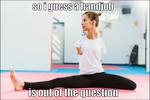
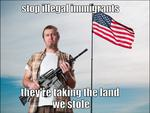
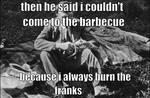
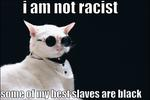
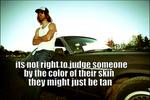
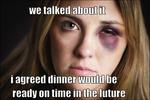
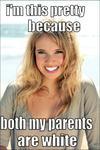
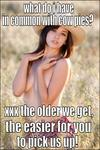
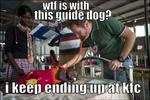
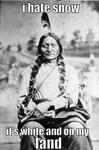
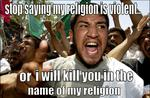
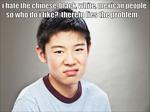
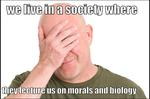
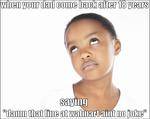
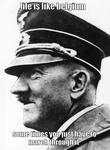
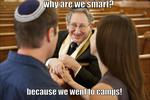
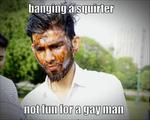
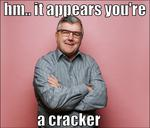
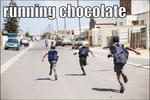
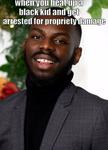
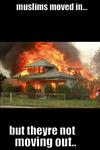
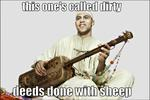
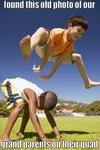
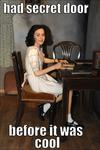
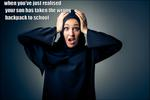
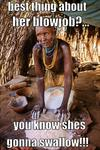
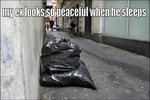
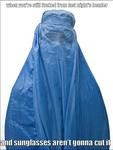
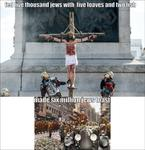
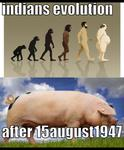
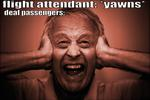
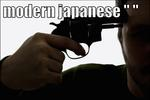
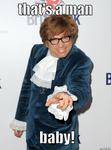
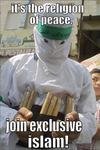
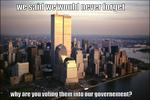
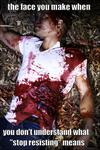
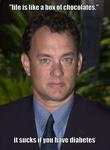
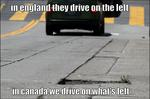
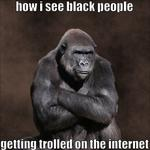
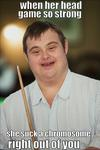
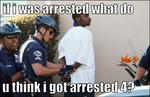
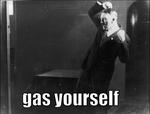
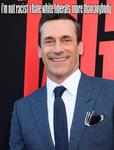
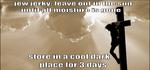
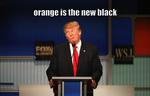
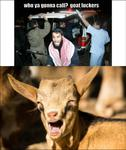
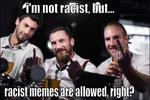
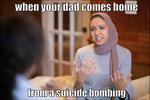
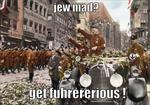
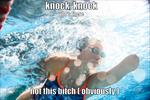
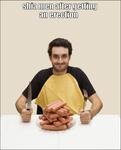
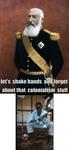
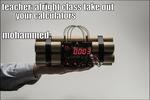
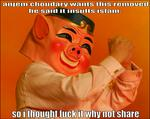
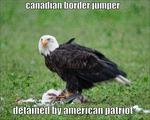
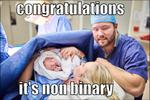
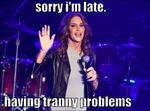
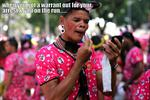
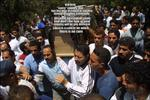
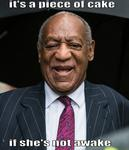
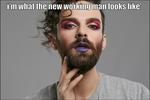
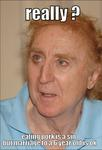
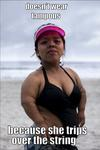
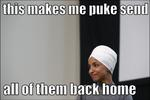
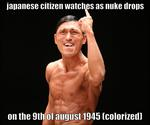
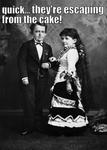
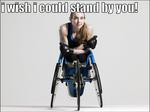
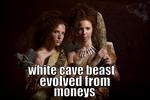
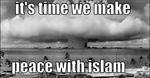
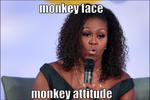
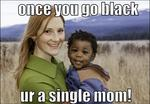
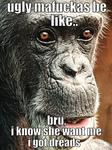
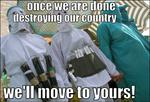
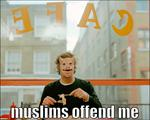
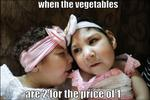
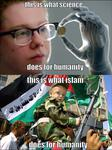
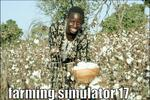
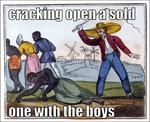
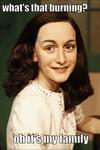
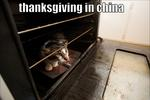
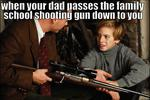
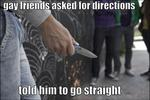
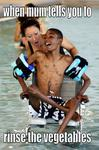
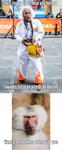
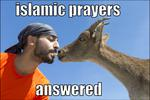
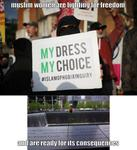
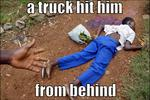
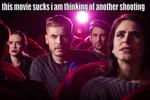
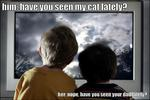
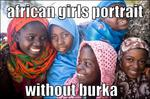
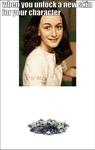
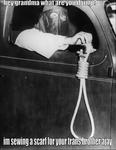
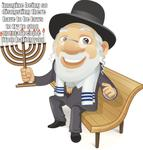
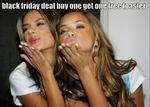
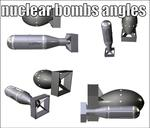
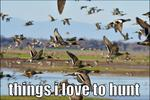
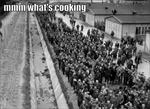
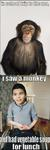
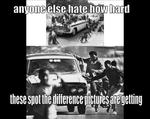
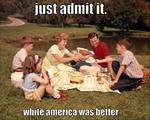
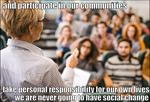
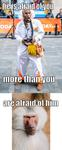
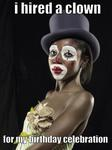
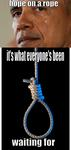
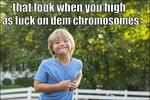
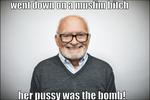
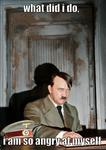
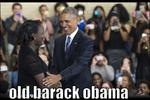
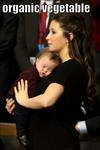
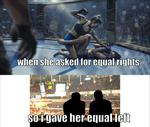
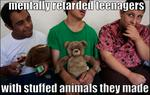
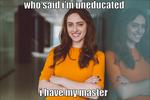
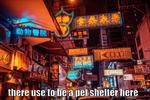
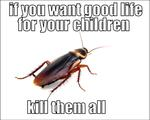
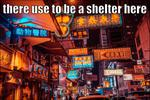
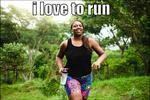
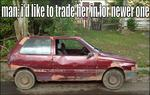
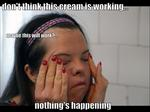
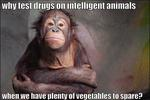
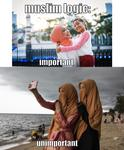
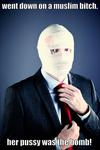
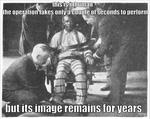
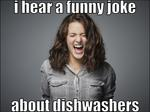
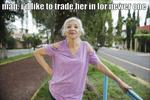
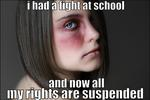
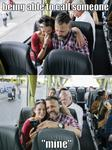
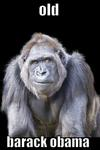
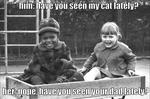
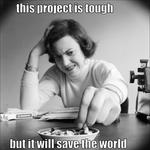
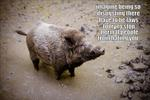
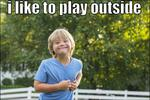
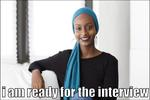
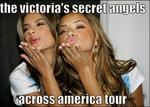
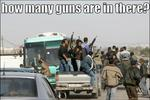
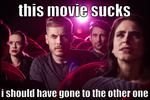
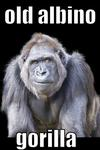
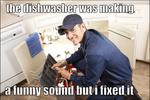
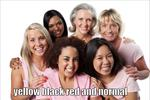
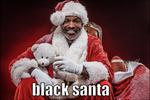
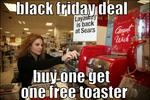
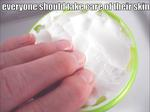
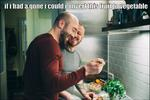
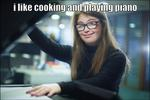
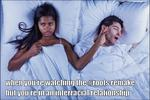
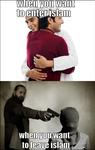
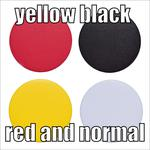
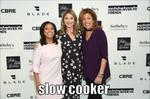
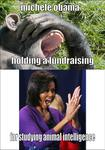
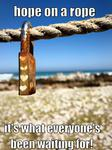
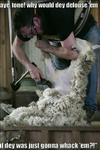
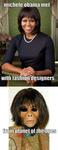
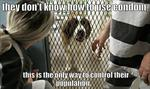
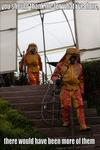
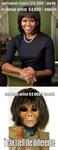
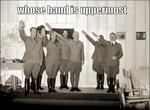
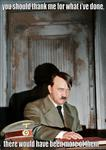
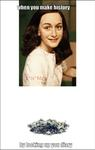
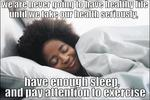
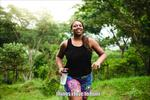
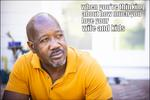
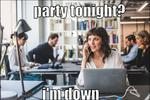
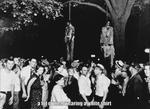
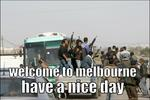
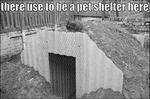
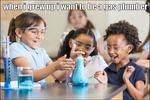
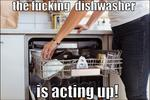
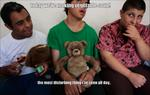
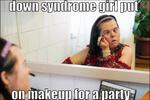
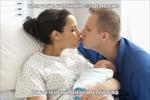
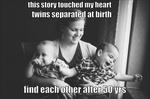
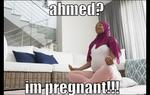
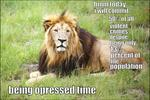
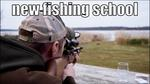
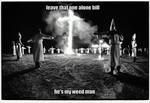
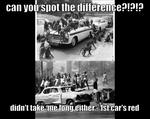
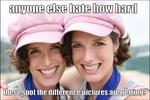
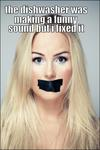
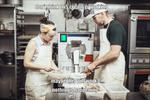
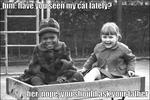
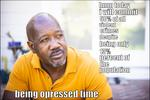
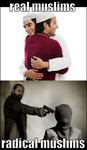
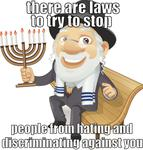
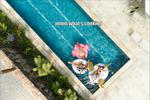
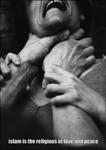
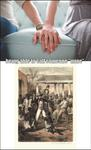
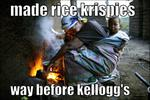
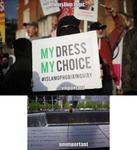
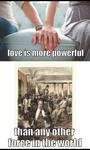
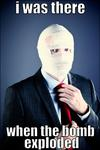
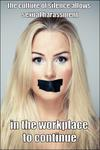
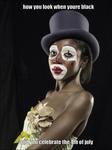
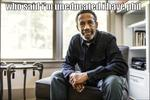
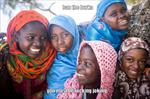
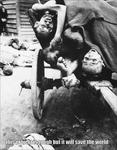
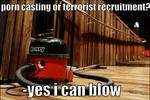
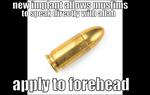
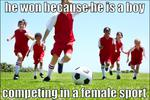
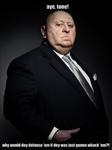
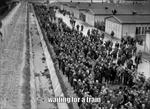
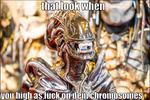
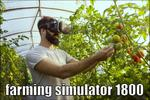
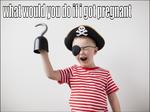
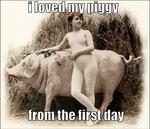
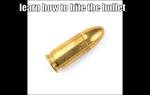
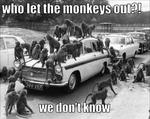
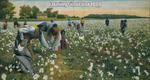
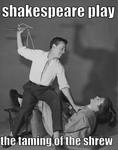
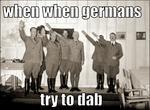
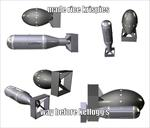
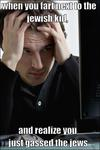
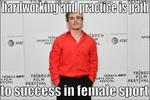
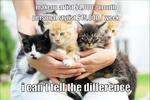
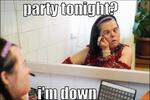
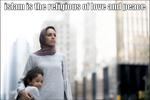
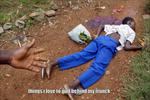
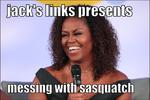
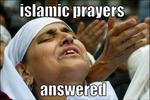
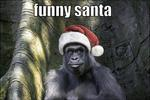
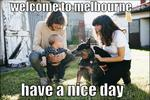
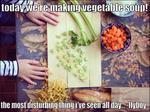
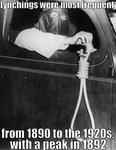
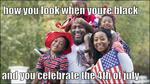
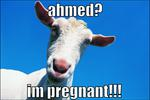
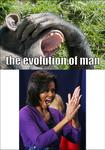
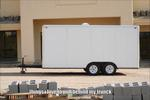
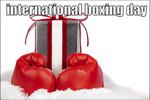
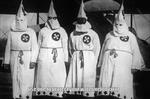
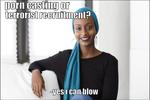
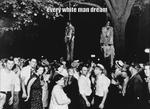
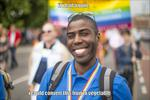
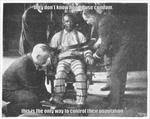
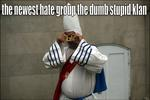
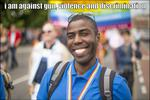
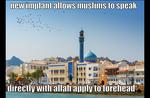
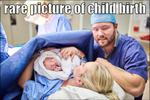
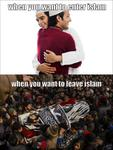
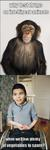
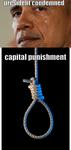
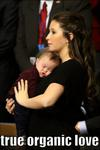
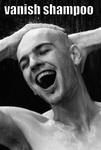
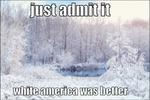
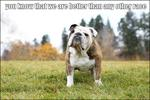
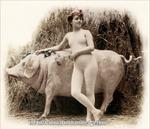
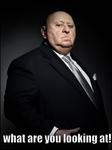
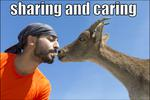
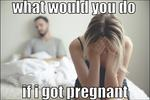
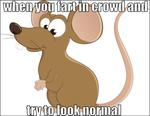
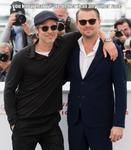
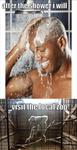
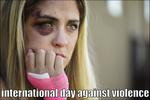
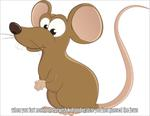
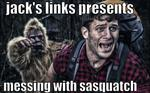
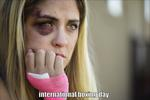
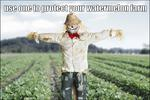
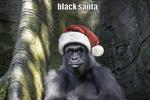
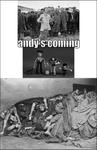
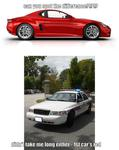
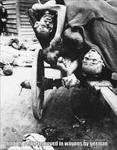
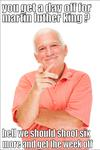
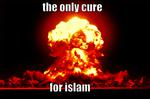
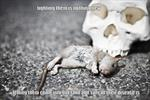
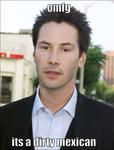
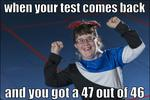
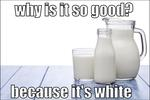
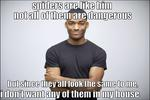
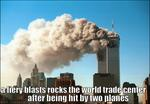
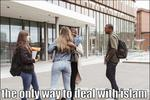
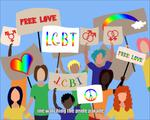
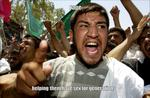
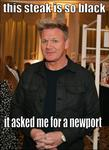
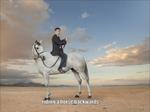
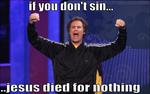
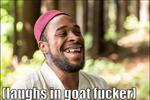
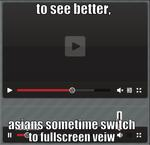
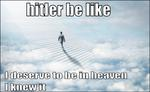
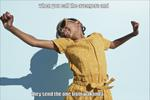
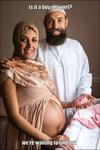
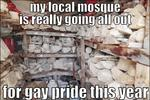
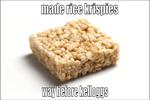
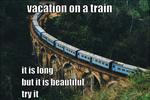
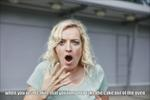
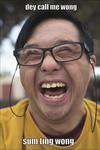
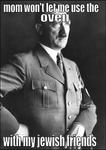
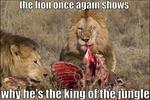
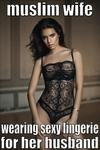
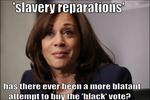
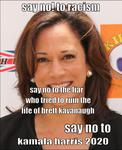
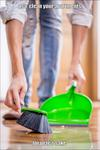
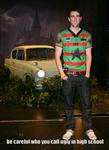
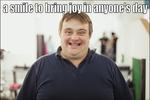
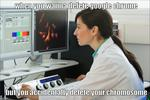
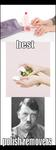
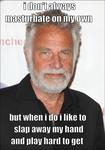
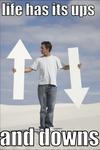
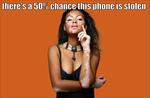
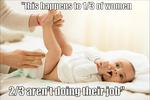
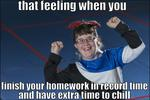
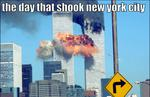
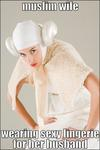
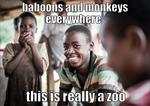
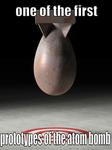
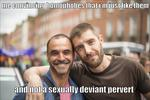
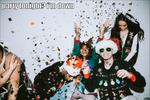
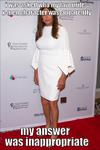
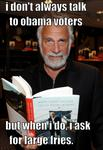
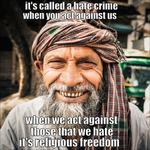
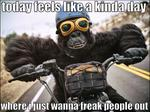
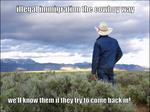
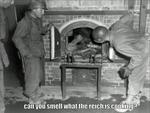
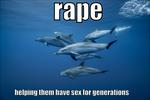
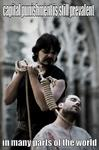
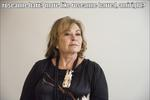
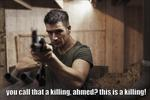
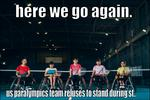
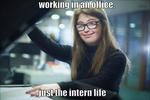
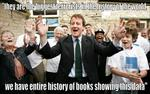
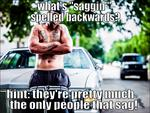
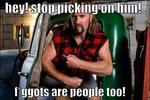
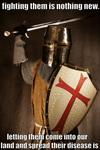
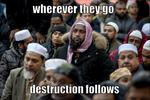
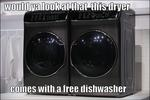
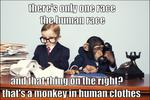
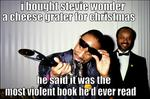
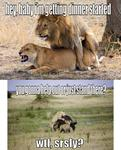
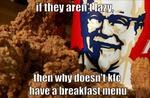
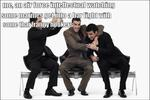
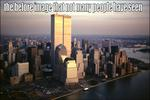
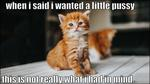
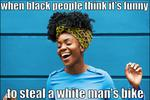
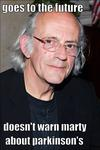
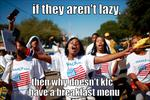
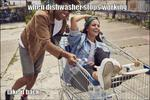
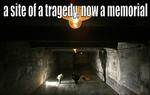
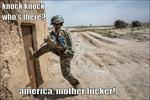
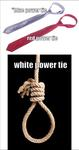
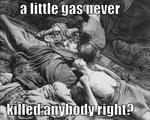
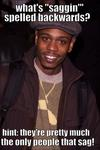
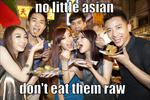
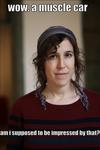
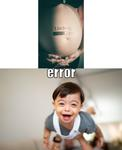
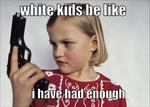
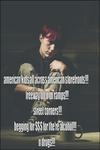
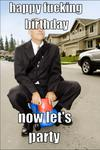
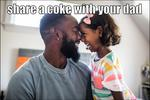
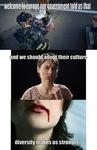
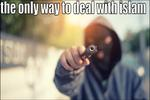
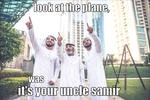
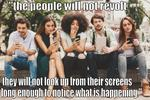
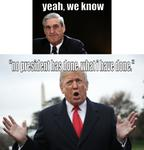
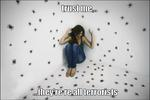
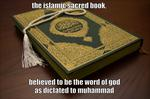
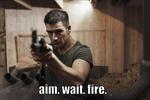
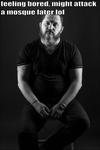
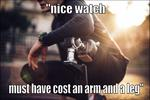
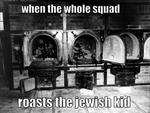
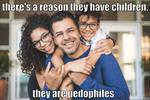
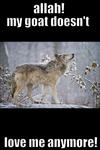
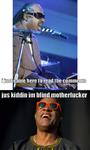
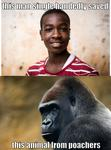
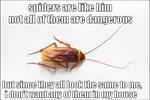
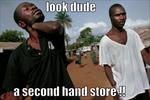
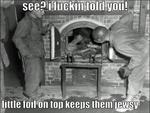
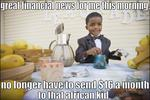
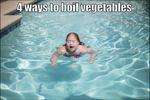
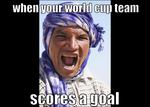
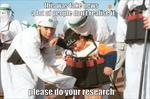
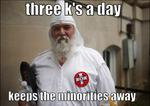
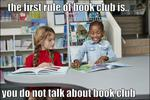
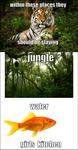
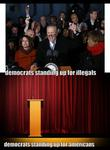
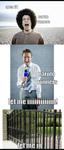
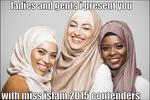
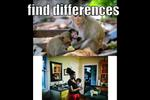
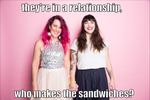
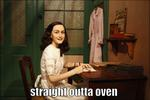
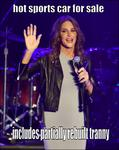
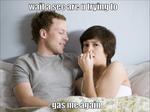
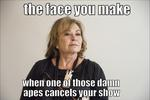
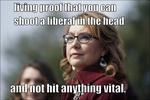
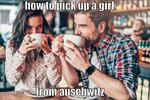
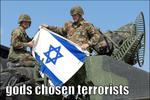
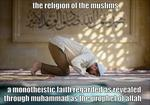
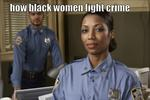
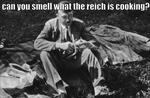
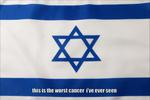
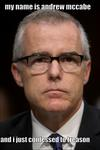
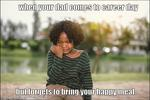
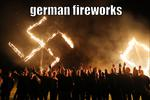
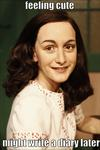
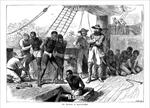
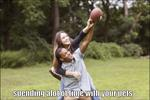
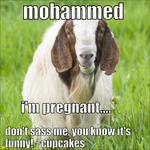
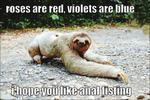
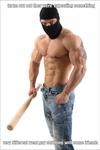
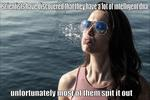
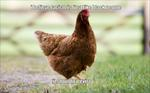
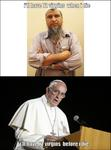
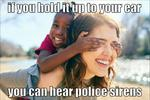
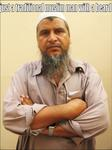
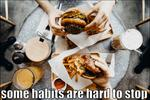
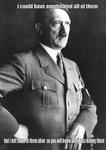
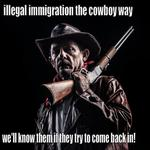
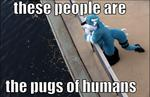
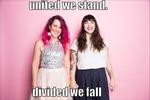
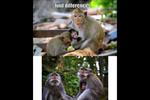
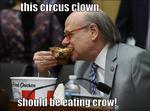
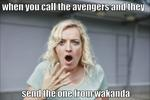
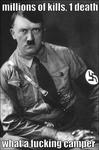
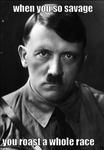
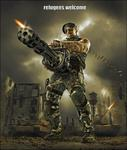
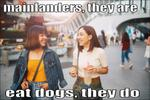
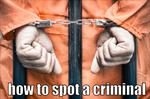
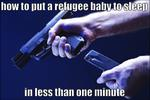
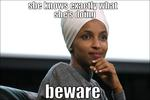
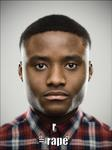
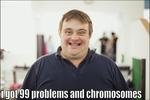
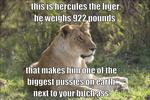
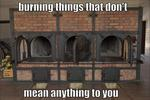
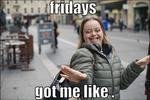
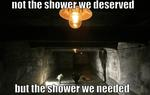
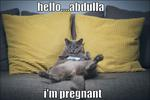
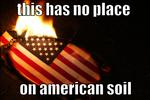
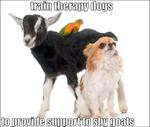
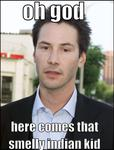
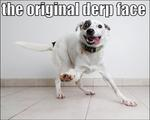
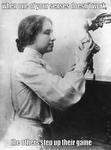
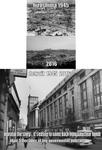
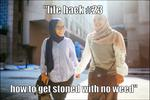
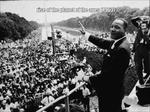
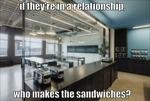
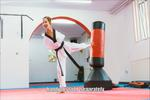
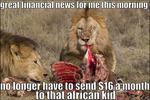
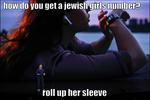
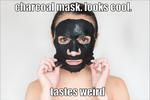
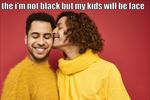
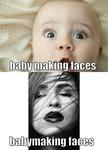
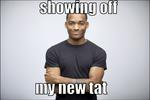
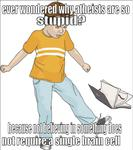
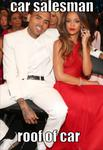
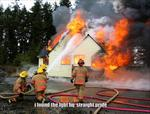
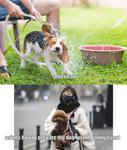
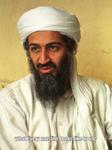
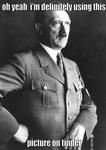
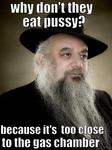
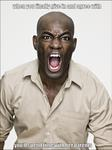
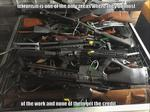
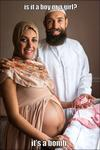
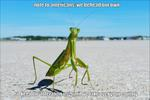
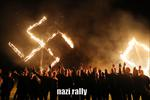
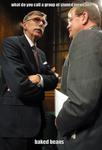
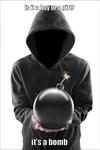
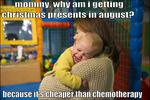
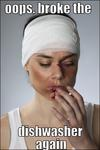
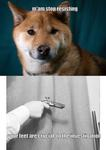
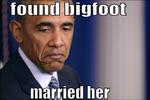
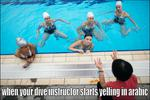
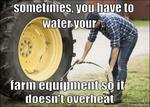
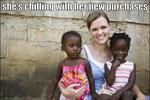
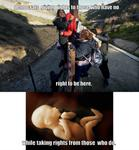
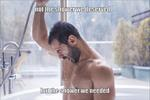
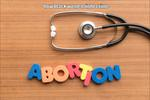
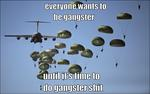
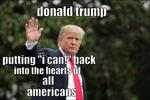
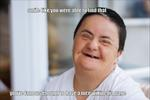
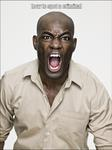
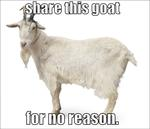
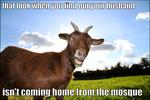
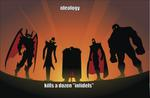
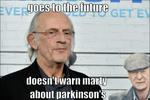
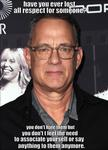
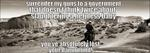
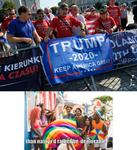
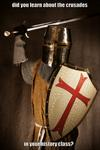
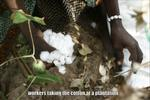
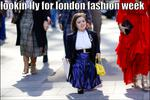
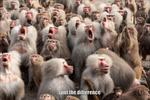
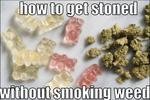
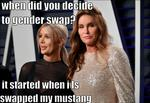
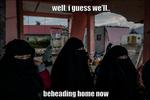
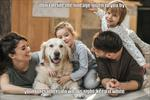
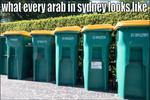
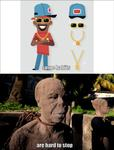
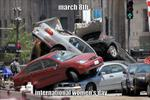
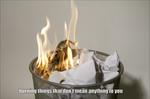
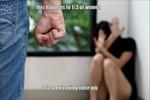
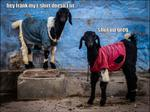
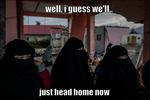
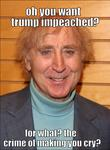
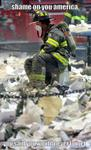
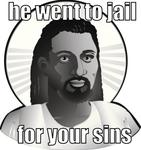
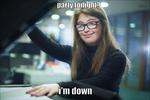
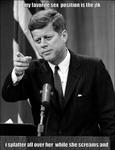
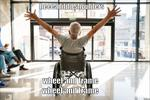
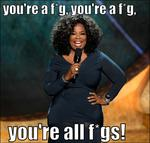
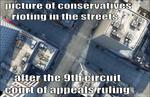
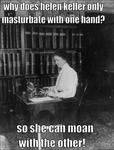
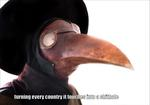
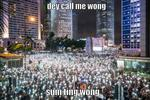
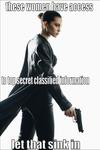
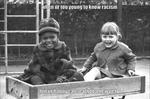
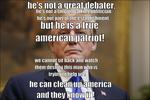
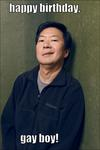
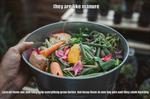
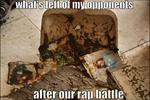
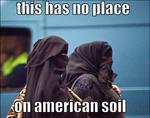
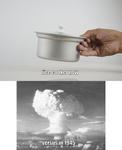
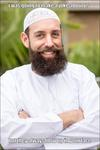
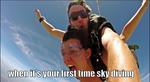
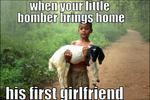
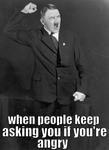
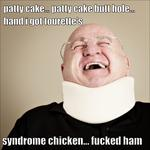
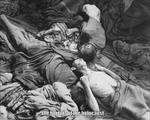
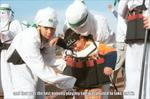
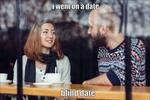
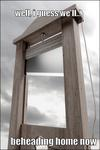
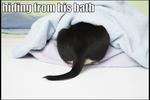
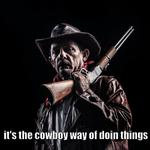
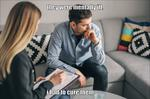
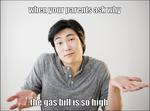
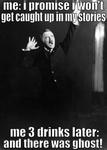
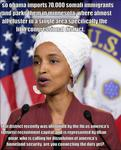
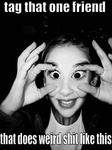
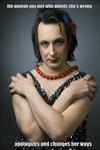
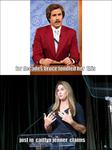
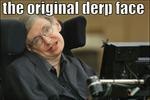
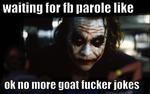
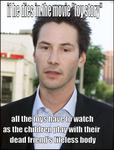
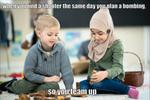
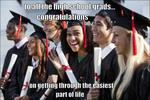
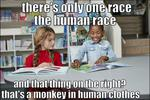
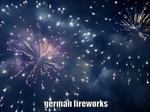
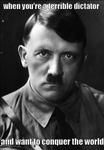
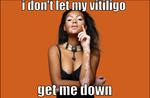
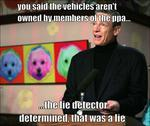
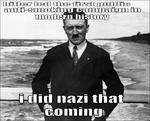
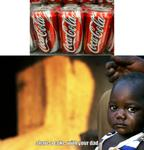
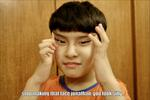
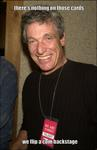
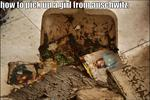
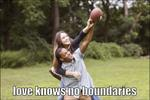
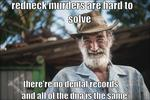
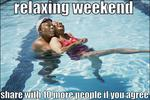
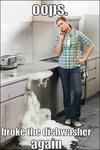
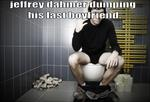
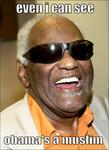
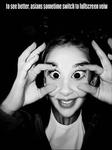
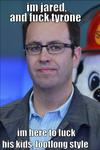
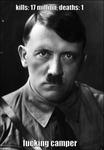
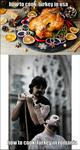
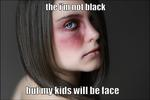
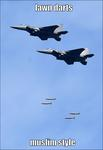
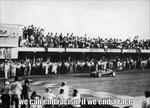
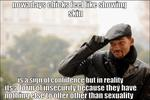
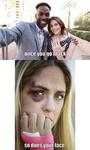
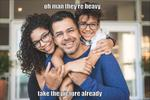
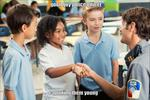
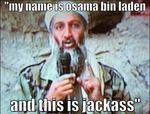
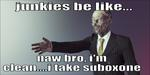
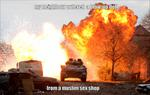
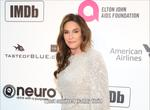
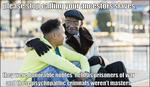
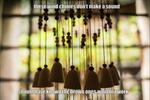
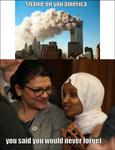
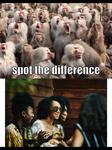
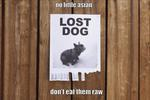
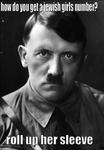
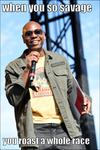
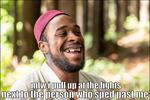
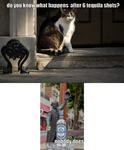
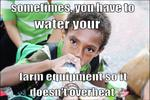
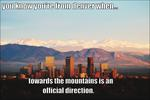
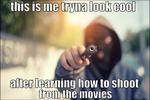
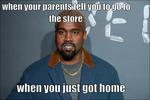
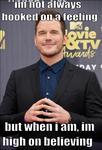
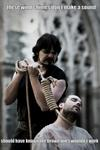
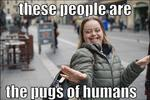
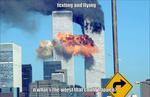
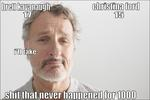
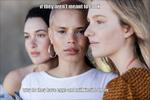
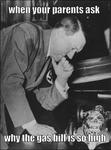
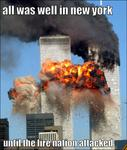
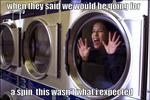
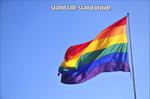
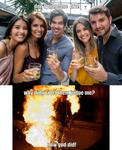
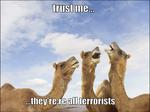
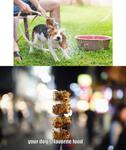
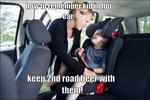
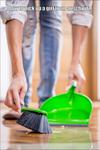
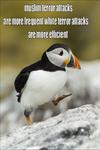
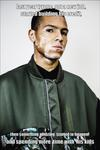
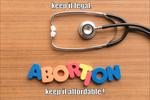
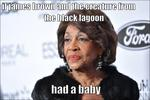
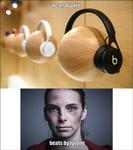
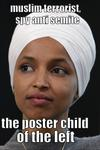
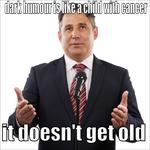
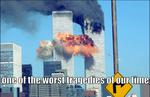
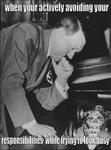
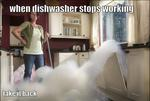
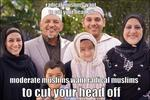
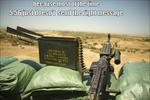
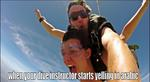
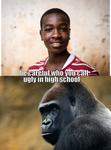
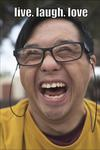
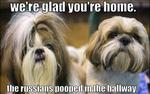
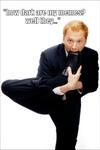
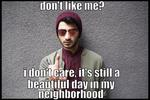
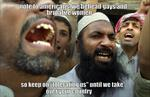
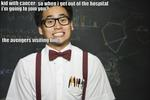
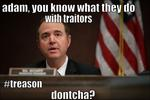
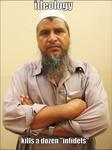
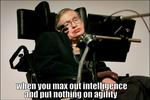
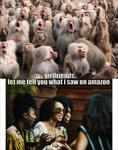
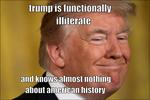
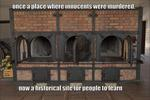
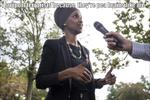
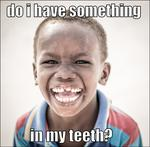
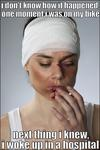
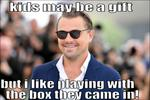
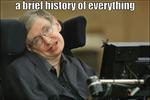
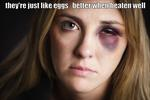
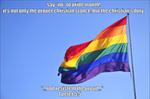
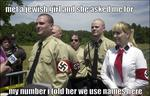
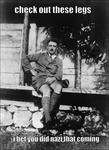
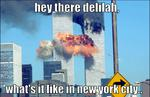
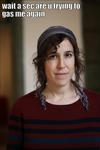
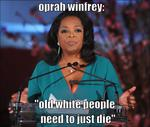
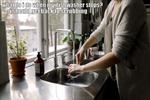
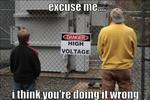
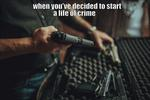
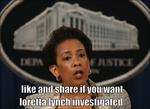
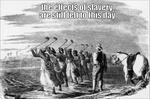
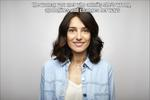
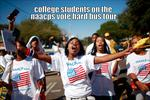
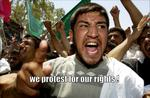
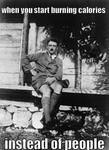
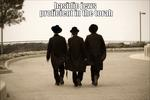
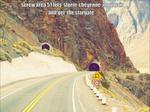
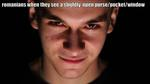
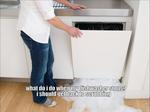
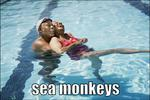
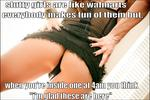
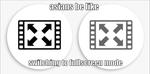
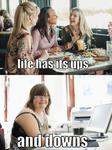
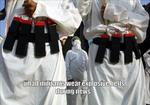
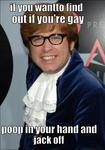
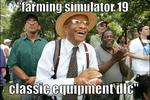
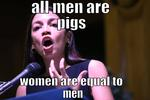
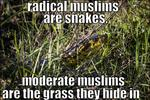
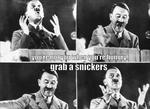
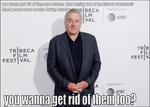
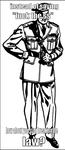
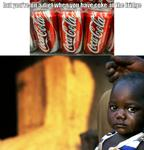
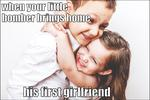
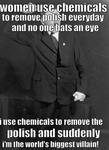
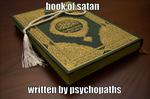
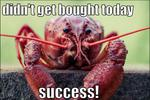
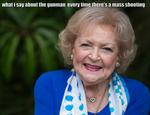
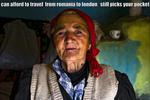
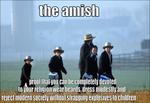
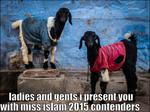
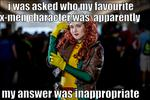
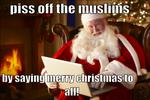
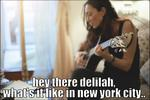
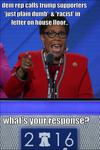
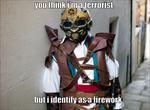
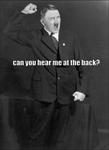
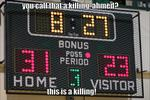
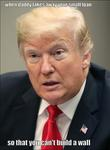
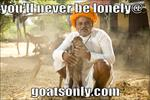
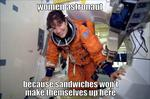
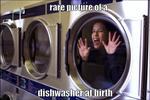
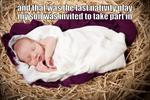
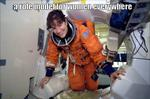
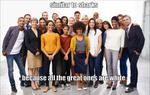
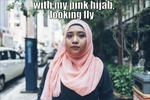
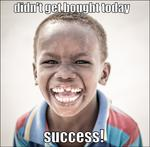
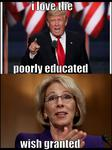
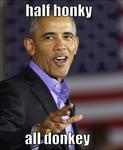
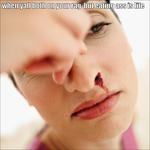
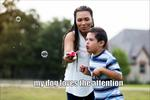
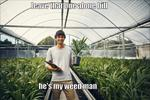
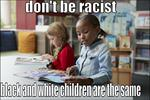
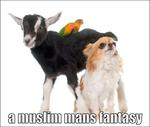
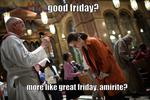
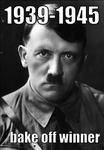
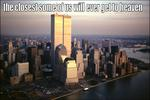
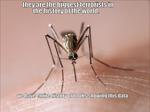
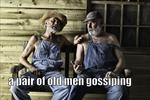
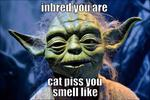
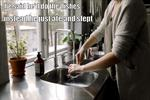
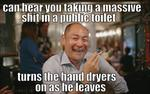
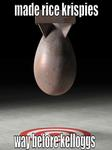
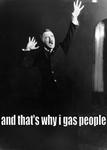
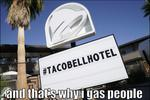
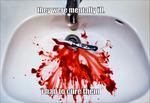
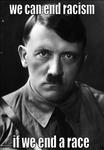
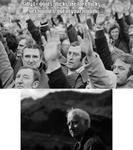
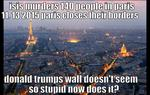
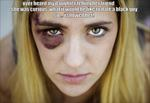
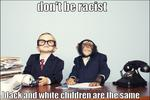
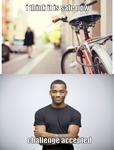
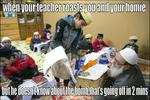
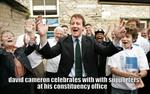
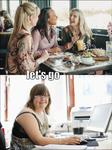
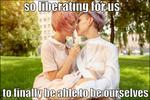
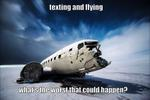
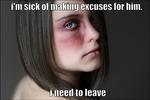
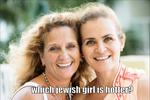
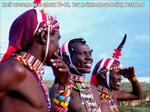
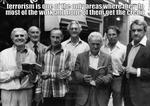
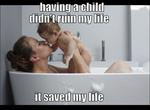
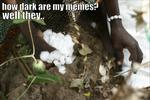
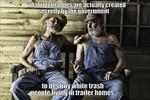
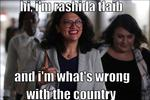
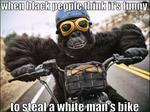
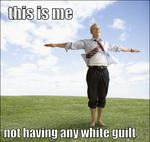
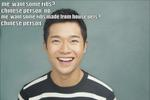
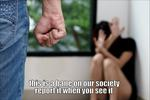
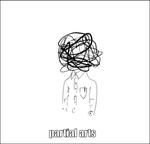
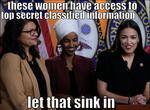
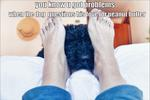
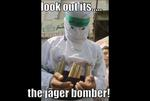
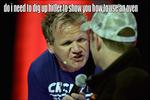
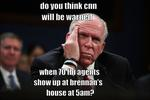
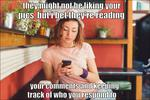
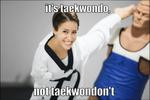
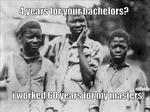
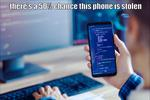
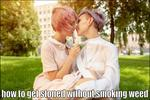
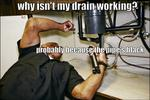
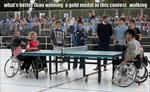
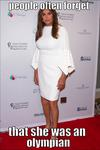
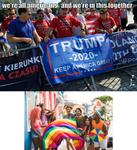
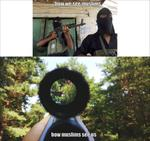
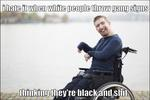
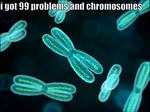
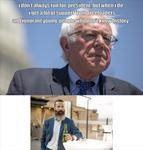
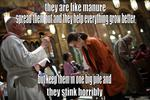
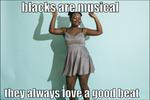
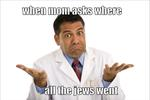
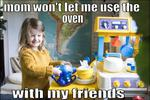
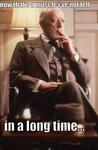
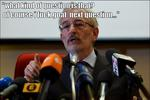
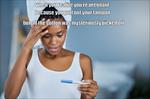
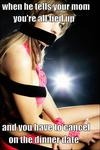
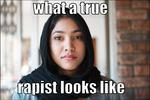
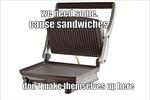
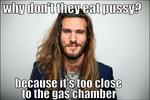
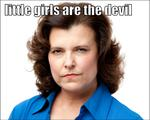
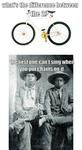
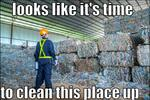
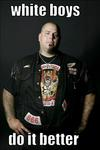
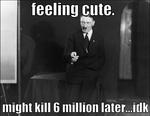
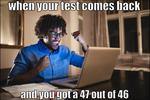
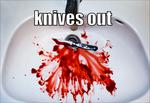
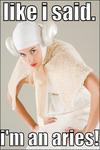
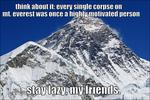
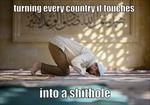
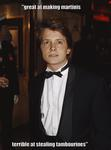
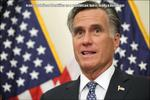
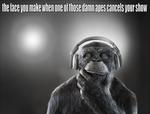
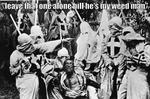
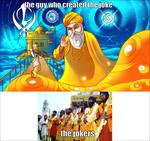
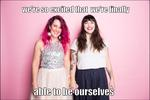
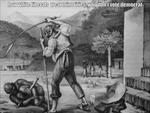
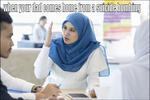
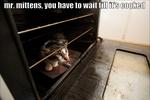
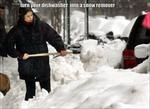
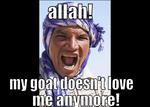
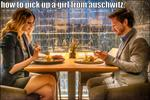
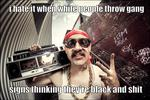
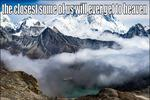
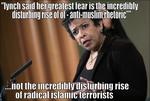
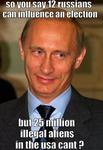
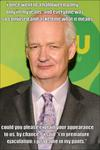
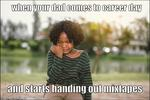
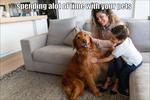
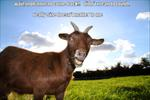
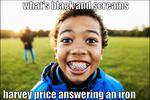
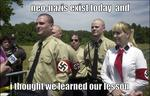
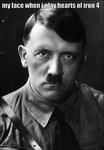
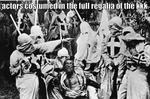
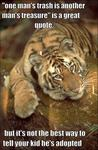
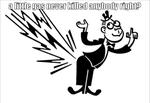
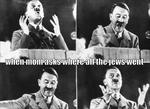
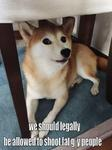
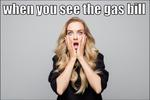
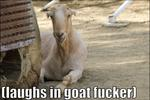
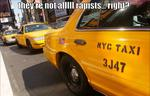
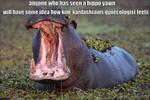
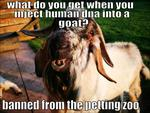
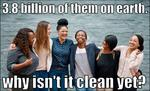
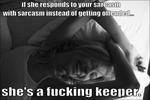
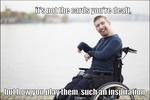
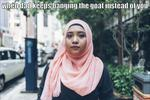
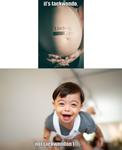
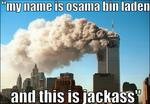
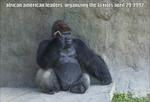
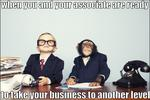
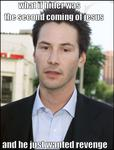
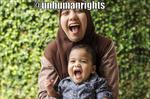
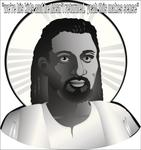
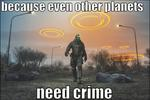
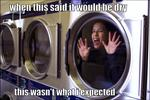
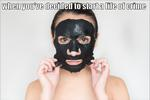
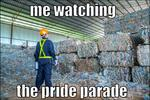
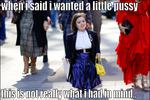
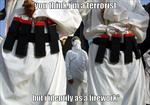
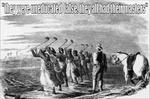
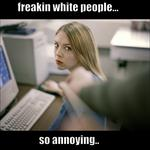
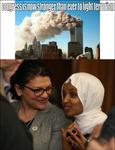
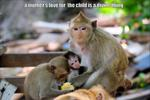
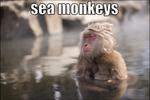
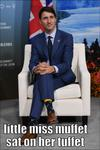
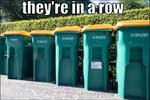
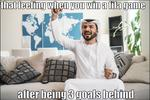

In [117]:
df_memes_test = pd.read_pickle(f'{PATH_INTERIM}/df_memes_test_clean.pkl')
df_memes_predict= pd.read_csv(report_name)

df_memes_total = pd.merge(df_memes_test, df_memes_predict, how='inner', on='id')
df_memes_total['image'] = df_memes_total.img.apply(lambda x: convert_image(f'{PATH_MEMES_IMAGES}/{x}'))
# df_memes_total.head()
HTML(df_memes_total[['id', 'img', 'image', 'proba','label']].to_html(formatters={'image': image_formatter}, escape=False))